## Cars Prediction prices

<hr>

Um projeto de Data Science que consiste em precificar os valores dos Carros através de Machine Learning. 
Dados retirados de um dataset do kaggle: https://www.kaggle.com/hellbuoy/car-price-prediction

<p align=center>
<img src="https://www.largus.fr/images/images/Mercedes-Classe-S-Coupe-63-AMG-2014-08.jpg?width=940&quality=80" width="60%"></p>

<hr>
<hr>

### Bibliotecas

In [1]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tqdm


from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split 
from sklearn.externals import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<hr>

### Exploração de dados 

Análise exploratória dos dados o objetivo é entender a principais Variáveis do problema
<hr>

Dicionário de dados: 		

* Car_ID -----  ID exclusivo de cada observação (Int)
* Symboling ----- Sua classificação de risco de seguro atribuída, Um valor de +3 indica que o automóvel é arriscado, -3 que provavelmente é bastante seguro.

* carCompany ------ Nome da empresa de automóvel (categórica)		
* fueltype ------- Tipo de combustível do carro, ou seja, gás ou diesel (categórico)
* aspiration ------ Aspiração usada em um carro (categórica)		
* doornumber ------ Número de portas em um carro (categórico)		
* carbody ------- carroçeria (categórica)		
* drivewheel ------ tipo de roda motriz (categórica)
* enginelocation ------- Localização do motor do carro (categórico)
* wheelbase	--------- Distância entre eixos do carro (numérica)
* carlength	------- Comprimento do carro (Numérico)
* carwidth -------- Largura do carro (Numérico)
* carheight	-------- altura do carro (numérico)
* curbweight -------- O peso de um carro sem ocupantes ou bagagem. (Numérico)
* enginetype --------- Tipo de motor. (Categórico)
* cylindernumber ------- cilindro colocado no carro (categórico)		
* enginesize -------- Tamanho do carro (Numérico)	
* fuelsystem -------- Sistema de combustível do carro (categórico)		
* boreratio	-------- Relação de furo do carro (numérico)	
* stroke -------- Curso ou volume dentro do motor (numérico)		
* compressionratio	------- taxa de compressão do carro (numérico)
* horsepower -------- Cavalos-força (numérico)		
* peakrpm -------- rpm de pico do carro (numérico)		
* citympg -------- Quilometragem na cidade (numérica)		
* highwaympg ------- Quilometragem na rodovia (numérica)		
* price(Dependent variable)	------- Preço do carro (Numérico)

In [2]:
# Carregando dados 
path = 'CarPrice_Assignment.csv'
cars = pd.read_csv(path)
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
print('Linhas: {}, Colunas: {}'.format(cars.shape[0], cars.shape[1]))

Linhas: 205, Colunas: 26


In [5]:
# Descrição Estatística 
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Média:  13276.710570731706


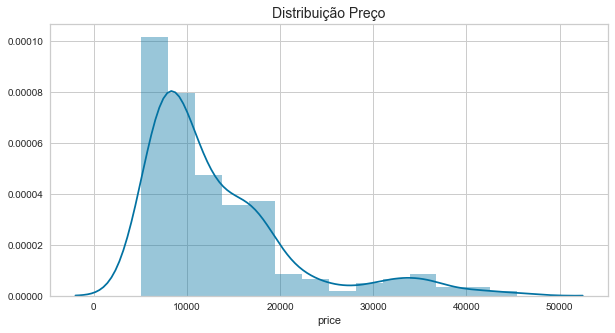

In [6]:
# Hitograma preço 
plt.figure(figsize=(10,5))
ax2 = sns.distplot(cars['price'], kde=True)
ax2.set_title('Distribuição {}'.format('Preço'), fontsize=14)

print('Média: ', cars['price'].mean())

Média: 104.1170731707317


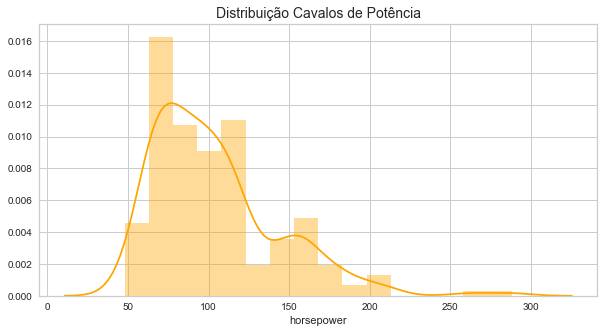

In [7]:
# Histograma Cavalos de potência

plt.figure(figsize=(10,5))
ax1 =sns.distplot(cars['horsepower'], color='orange')
ax1.set_title('Distribuição {}'.format('Cavalos de Potência'), fontsize=14)

print('Média: {}'.format(cars['horsepower'].mean()))

Text(0.5, 1.0, 'Distribuição Peakrpm')

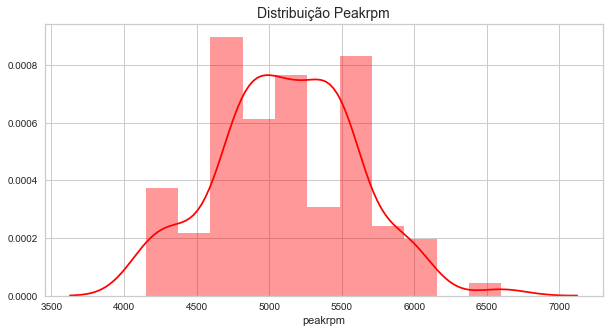

In [8]:
# Histograma de RPM 
plt.figure(figsize=(10,5))
ax = sns.distplot(cars['peakrpm'], color='red')
ax.set_title('Distribuição {}'.format('Peakrpm'), fontsize=14)

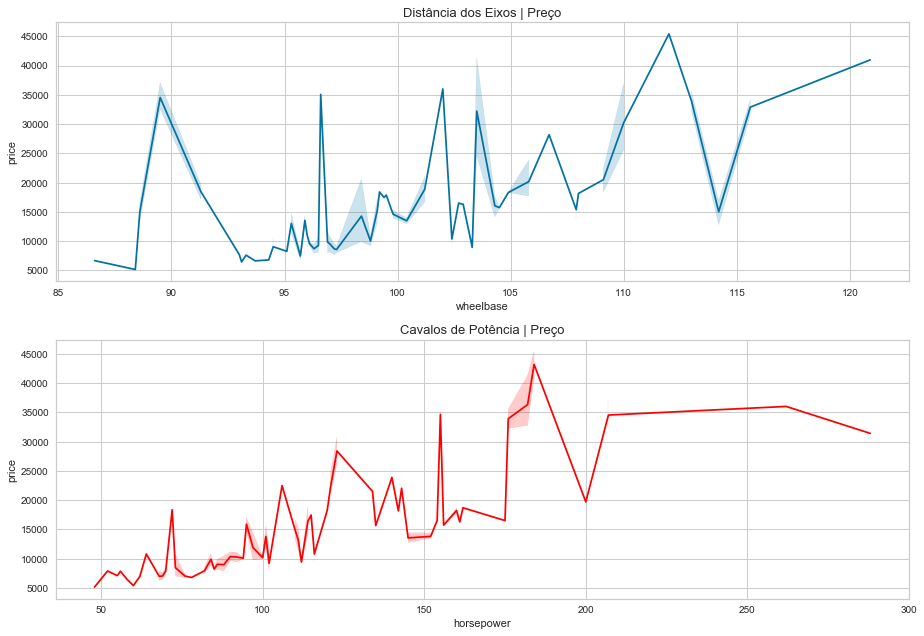

In [9]:
plt.figure(figsize=(13,9))

# Distância entre os eixos | Preço do carro 
ax1 = plt.subplot(2,1,1)
sns.lineplot(x=cars['wheelbase'], y=cars['price'],data=cars, palette='coolwarm', ax=ax1)
ax1.set_title('Distância dos Eixos | Preço', fontsize=13)


# Cavalos de Potência | Preço do carro 
ax2 = plt.subplot(2,1,2)
sns.lineplot(x=cars['horsepower'], y=cars['price'],data=cars, color='red', ax=ax2)
ax2.set_title('Cavalos de Potência | Preço', fontsize=13)

plt.tight_layout()

Text(0.5, 1.0, 'Quantidade Combustível')

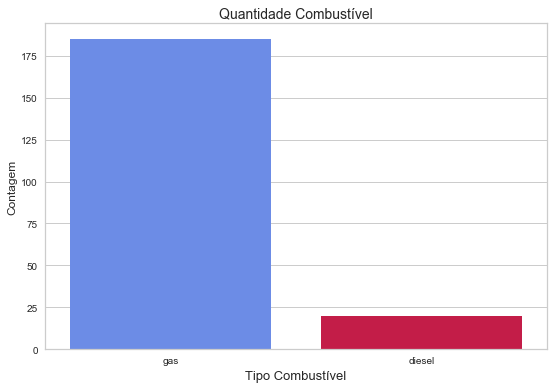

In [10]:
# Quantida de combustível

palette=['#5882FA', '#DF013A']

plt.figure(figsize=(9,6))
ax = sns.countplot(x='fueltype', data=cars, palette=palette)
ax.set_xlabel('Tipo Combustível',fontsize=13)
ax.set_ylabel('Contagem', fontsize=12)
ax.set_title('Quantidade Combustível', fontsize=14)

<hr>
<hr>

Vou plotar gráficos Scatter que vão me dar um parâmetro sobre a relação linear das variáveis com o Preço do carro. 
Selecionei as variáveis mais interessantes visto nos outros gráficos. 

Text(0.5, 1.0, 'CV potência | Preço')

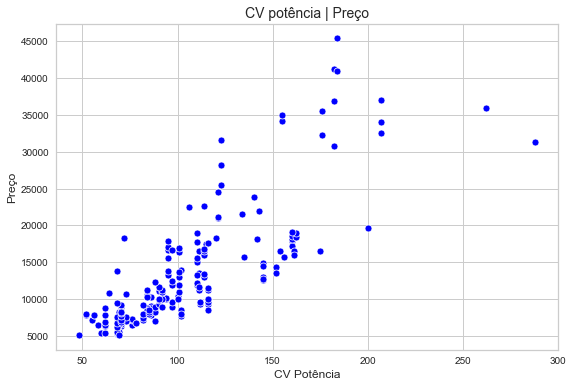

In [11]:
# Relação Potência | Preço do carro 

plt.figure(figsize=(9,6))

ax = sns.scatterplot(x='horsepower', y='price', data=cars ,color='blue')
ax.set_xlabel('CV Potência', fontsize=12)
ax.set_ylabel('Preço', fontsize=12)
ax.set_title('CV potência | Preço', fontsize=14)

A média de CV de potência é de <b> 104 Cavalos </b> o valor do carros tem sim uma relação linear com o potência do carro, vejamos que quando passa dos <b> 160 Cavalos </b> os dados tem uma disipação, mostrando que tem carro com cerca de 288 CV com um valor inferior a um carro com 160 Cavalos, etnão há sim uma relação linar entre essas duas variáveis, mas não é um relação muito forte. 

Vale levar em consideração que não há variável "Ano do Carro" pois iria afetar demais no modelo, seria mais fácil ver a relação entre essas duas features. 

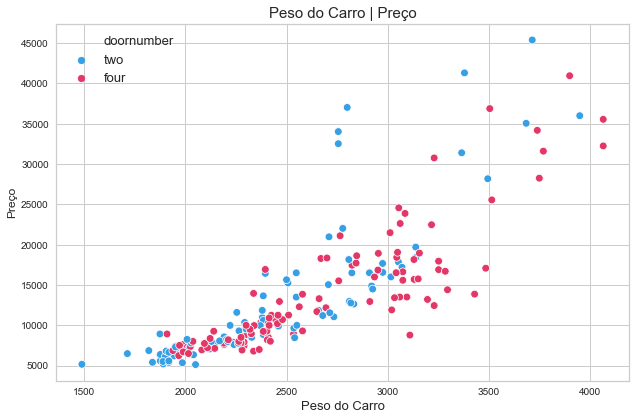

In [12]:
# Relaçõa linear Peso do carros | Preço 
# legenda informa o número de portas

plt.figure(figsize=(9,6))

palette = ['#379FE3' , '#E33768']

ax = sns.scatterplot(x='curbweight', y='price', data=cars,hue='doornumber', palette=palette, s=60)
ax.set_xlabel('Peso do Carro', fontsize=13)
ax.set_ylabel('Preço', fontsize=12)
ax.legend(loc='upper lefet', fontsize=13)
ax.set_title('Peso do Carro | Preço', fontsize=15)
plt.tight_layout()
plt.show()

São <b> 115 </b> carros com 4 portas no dataset e <b> 90 </b> carros com 2 portas. 
Com entendimento do negócio de carros os veículos com 2 portas são em grande parte veículos de luxo há essa tendência,
mas neste dataset não está presente carros com valores altíssimos e nos mostra que não temos um divisão mais sofisticada de carros.

Text(0.5, 1.0, 'KM Cidade | Preço')

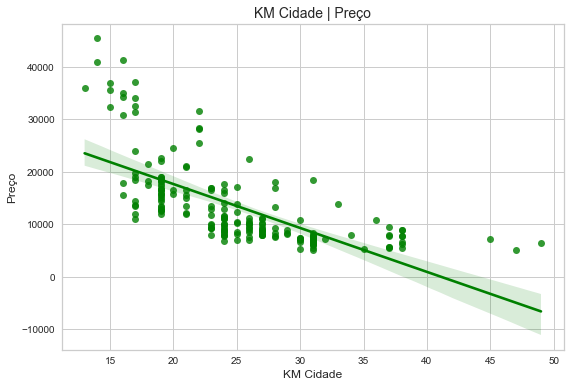

In [13]:
# Relação KM rodados na Cidade | Preço 

plt.figure(figsize=(9,6))

ax = sns.regplot(x='citympg', y='price', data=cars, color='green')
ax.set_xlabel('KM Cidade', fontsize=12)
ax.set_ylabel('Preço', fontsize=12)
ax.set_title('KM Cidade | Preço', fontsize=14)

Lógicamente já seria esperado ver que Quanto mais KM rodado mais baixo seria o valor do carro, e quanto menor a Kilometragem maior seria o valor do carro, vamos ver melhor a força dessa relação no gráfico de Correlação de Pearson. 

<hr>

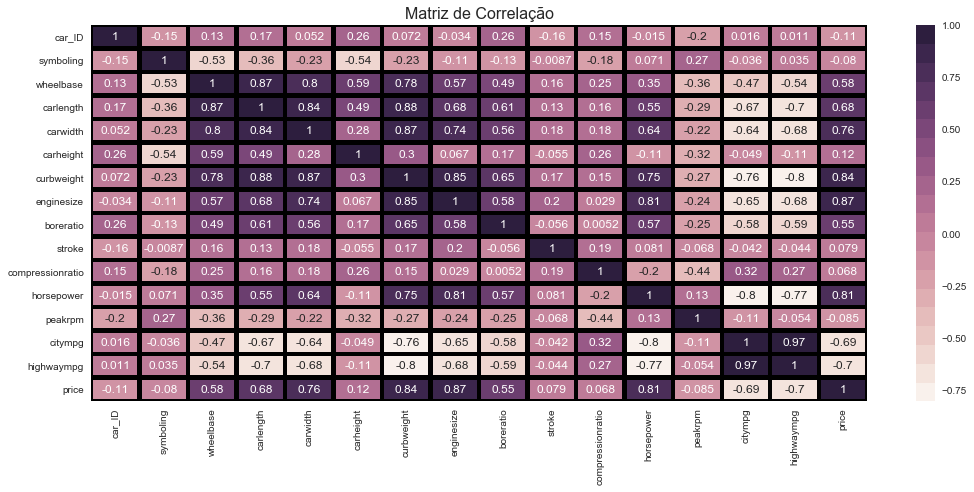

In [14]:
# Correlação de Pearson 

# Matriz de Correlação Pearson 
cars_corr = cars.corr(method='pearson')
cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15)

plt.figure(figsize=(15,7))
plt.title('Matriz de Correlação', fontsize=16)
sns.heatmap(cars_corr, cmap=cmap, annot=True, lw=3.4, linecolor='black')
plt.tight_layout()

Há variáveis muito correlacionadas entre si, o que pode indicar multicolinearidade no conjunto de dados, em outra parte das variáveis há correlações baixas e negativas, o que é esperado neste contexto de negócio que se trata de Autmóveis, uma feature muita das vezes tem a tendência de aumentar o valor do carro, um acessório, quantidade de portas, potência do motor, etc. 

Text(0.5, 1.0, 'Número de portas | Preço')

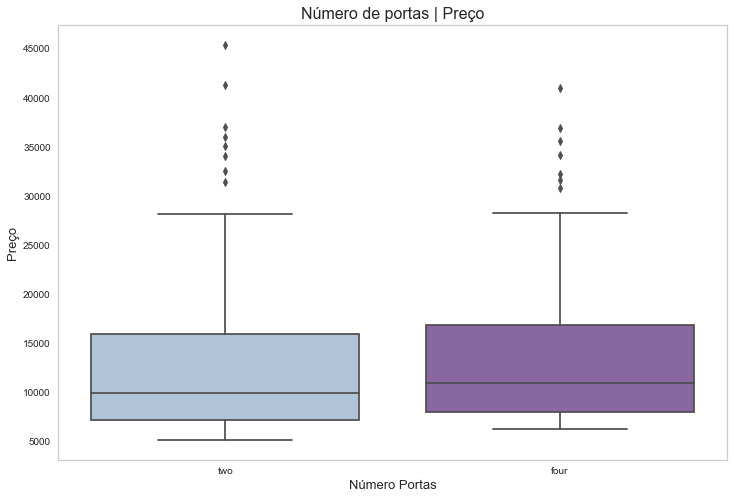

In [15]:
# Boxplot Preço / Número de portas 

plt.figure(figsize=(12,8))
plt.grid(False)
ax = sns.boxplot(x='doornumber', y='price', data=cars, palette='BuPu', orient='v')
ax.set_xlabel('Número Portas',fontsize=13)
ax.set_ylabel('Preço', fontsize=13)
ax.set_title('Número de portas | Preço', fontsize=16)

O conjunto de dados possui apenas carros populares, não passando da faixa de R$ 45.400 não como inferir que carros de possuem duas portas tem um viés mais esportivo, do que carros com quatro portas, mas a diferença de valores é bem equilibrada, não vou tratar Outliers neste projeto pois os valores dos carros estão bem de acordo com o mercado automotivo, configurações diferentes de cada carro afeta considerávelmente o preço do automóvel. 

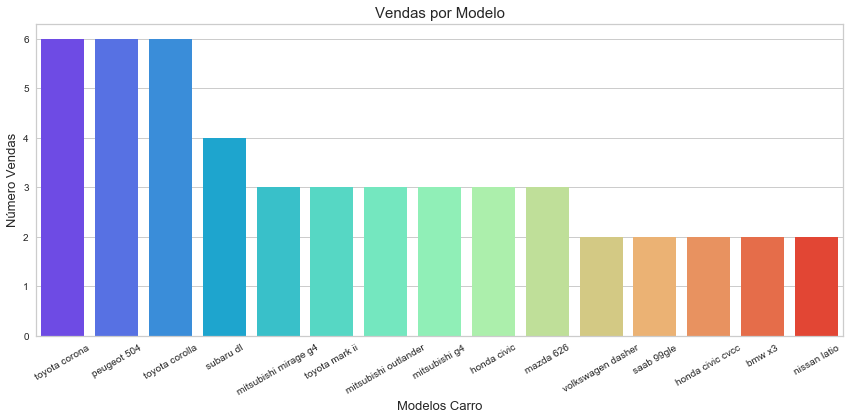

In [16]:
# Ordernar filtro 
order = cars['CarName'].value_counts().index

# GnBu_d

fig, axe = plt.subplots(figsize=(12,6))

axe = sns.countplot(cars['CarName'], data=cars, palette='rainbow', order=order[:15])
axe.tick_params(axis='x', rotation=30)
axe.set_xlabel('Modelos Carro', fontsize=13)
axe.set_ylabel('Número Vendas',fontsize=13)
axe.set_title('Vendas por Modelo',fontsize=15)
plt.tight_layout()
plt.show()

<hr>
<hr>
<hr>
<br>

## Pré-processamento 

* MinMaxScale
* One Hot Enconding | get_dummies 
* Nomes incorretos dentro das tabelas (Marca do carro)
* Missing Values 

In [17]:
# Valores nulos 
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
def remove_spaces():
    '''  
    Remover espaços em branco
    da coluna CarName
     ''' 
    cars['CarName'] = cars['CarName'].str.split(' ', expand=True)
    return cars['CarName'].unique()

In [19]:
remove_spaces()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
def rename():
    '''
    Renomeando valores escritos errados 
    Na coluna CarName
    '''
    return cars['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen', 'corona':'Corola'})

In [21]:
rename()

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [22]:
# Verificando Duplicados 
cars.loc[cars.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [23]:
# Separando tipos de dados
cat_cols = cars.select_dtypes(include=['object']).columns
num_cols = cars.select_dtypes(exclude=['object']).columns 

car_cat = cars[cat_cols]
car_num = cars[num_cols]

In [24]:
# Dummies 
dummies = pd.get_dummies(cars[cat_cols], prefix=cat_cols, drop_first=True)
dummies.shape

(205, 56)

In [25]:
# Concatenando
cars = pd.concat([cars, dummies], axis=1)
cars.drop(cat_cols, axis=1, inplace=True)
cars.shape

(205, 72)

In [26]:
# Features numéricas 
numeric_cols = ['symboling', 'wheelbase', 'carlength',
                'carheight','curbweight', 'enginesize',
                 'enginesize', 'boreratio', 'stroke', 
                'compressionratio','horsepower','peakrpm',
                 'citympg', 'highwaympg']


min_max = MinMaxScaler(feature_range=(0,1))
cars[numeric_cols] = min_max.fit_transform(cars[numeric_cols])
cars.drop(['car_ID'], axis=1, inplace=True)
cars.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,64.1,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,64.1,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,65.5,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,66.2,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,66.4,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,1,0,0


<hr>
<hr>
<br>
<hr>
<hr>

## Baseline

O conceito é criar um modelo bruto com o minímo de pré-processamento para estimar a performace do modelo que será definito como uma solução ao problema. Vou interpretar o modelo feito posteriormente a baseline como sendo bom ou ruim conforme as métricas.

In [27]:
# criando baseline 
X_baseline = cars.drop('price', axis=1)
y_baseline = cars['price']
  
X_train_baseline , X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline,y_baseline, test_size=0.3, random_state=12)

# Treinando modelo 
baseline = LinearRegression()
baseline.fit(X_train_baseline, y_train_baseline)
y_pred_baseline = baseline.predict(X_test_baseline)


print('----------- BASELINE -----------')
print('\n')
print('Número de Features: {}'.format(X_baseline.shape[1]))
print('MSE: {}%'.format(mean_squared_error(y_test_baseline, y_pred_baseline)))
print('MAE: {}%'.format(mean_absolute_error(y_test_baseline, y_pred_baseline)))
print('R2: {}%'.format(r2_score(y_test_baseline, y_pred_baseline).round(5)*100))
print('\n')

----------- BASELINE -----------


Número de Features: 70
MSE: 1.1335776139747581e+30%
MAE: 144121003083131.56%
R2: -2.0927278165729552e+24%




O modelo feito de forma "Pura" com muitas variáveis e sem penalização retornou nas métricas valores péssimos, houve um grande Underfitting pois o modelo mostra que não aprendeu a relação das features com a variável dependente, o R2 ficou negativo evidênciando que se a reta fosse baseada na média de Y seria melhor do que este criado, não houve técnica de redução de dimensionalidade nem mesmo Feature selection, o objetivo é mostrar neste projeto o uso de Regularizadores L1 e L2 e seus ganhos. 

<hr>
<hr>
<hr>

## Lasso Regression 

Modelo linear treinado com L1 antes como regularizador (também conhecido como Lasso),A regressão do laço é um tipo de regressão linear que usa retração.Encolhimento é onde os valores dos dados são reduzidos em direção a um ponto central, como a média . O procedimento de laço incentiva modelos simples e esparsos (ou seja, modelos com menos parâmetros). Esse tipo específico de regressão é adequado para modelos que mostram altos níveis de mutinearidade ou quando você deseja automatizar certas partes da seleção de modelos, como seleção de variáveis / eliminação de parâmetros.

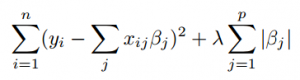

OBS: O Lasso possui uma penalização que é forte contral a dimensionalidade do modelo, ele de maneira automática vai retirar (penalizando) as variáveis que menos agrega na performance do modelo. 

In [28]:
# Construindo modelo Lasso 

X_lasso = cars.drop('price', axis=1)
y_lasso = cars['price']

# Split 
X_train_lasso , X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso,y_lasso, test_size=0.3, random_state=12)


# Lasso
lasso = Lasso(alpha=5.0, random_state=12) # Quanto maior o alpha maior a penalização aplicada 
lasso.fit(X_train_lasso, y_train_lasso)
y_pred_lasso = lasso.predict(X_test_lasso)


# R2 Ajustado 
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)

adj_r2_lasso = (1 - (1 - r2_lasso) * ((X_train_lasso.shape[0] - 1) / 
          (X_train_lasso.shape[0] - X_train_lasso.shape[1] - 1)))

    
# Métricas Lasso
print('-------------- LASSO ---------------')
print('\n')
print('Número de Features Entrada: {}'.format(X_lasso.shape[1]))
print('MSE: {}'.format(mean_squared_error(y_test_lasso, y_pred_lasso)))
print('MAE: {}'.format(mean_absolute_error(y_test_lasso, y_pred_lasso)))
print('R2: {}%'.format(r2_score(y_test_lasso, y_pred_lasso).round(5)*100))
print('R2 Ajustado: {}%'.format(adj_r2_lasso.round(5)*100))
print('\n')

-------------- LASSO ---------------


Número de Features Entrada: 70
MSE: 6247120.844975361
MAE: 1697.9550591004738
R2: 88.467%
R2 Ajustado: 77.254%




### R2-Ajustado

Como neste problema de Regressão estou utilizando 70 Variáveis independentes, a multicolinearidade pode causar efeitos muito grandes nos resultados da predição, o R2 é uma métrica não robusta contra a complexidade de um modelo e acaba enganando quando se tem um dimensionalidade considerável. Por isso vou compará-lo com o <b>R2-Ajustado</b> que vai penalizar a quantidade de variáveis, ele mostra um ponto lógico no termo de quantidade de variáveis e resultado final do modelo. 

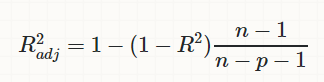

<hr>
<hr>
<br>
<hr>
<hr>

## Rigde Regression 



<br>
Mínimos quadrados lineares com regularização de L2. Este modelo resolve um modelo de regressão em que a função de perda é a função de mínimos quadrados lineares e a regularização é dada pela norma L2. Também conhecida como Regressão de Ridge ou regularização de Tikhonov.

A regressão de Ridge é uma maneira de criar um modelo parcimonioso quando o número de variáveis preditoras em um conjunto excede o número de observações ou quando um conjunto de dados possui multicolinearidade (correlações entre variáveis preditoras).

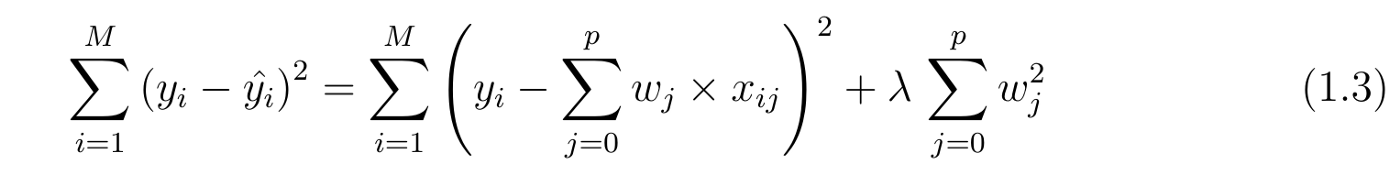

<br>
<hr>

In [29]:
# Modelo Ridge Regression     
features = cars.drop('price', axis=1)
target = 'price'
    
# definindo X e y 
X_ridge = features
y_ridge = cars[target]

X_train_ridge , X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge,y_ridge, test_size=0.3, random_state=12)

 # Treinando modelo 
ridge = Ridge(alpha=3.0, random_state=12)
ridge.fit(X_train_ridge, y_train_ridge)
y_pred_ridge = ridge.predict(X_test_ridge)
    
# R2 Ajustado 
r2_ridge = r2_score(y_test_ridge, y_pred_ridge)

adj_r2_ridge = (1 - (1 - r2_ridge) * ((X_train_ridge.shape[0] - 1) / 
          (X_train_ridge.shape[0] - X_train_ridge.shape[1] - 1)))

    
# Métricas Ridge 
print('-------------- RIDGE ---------------')
print('\n')
print('Número de Features Entrada: {}'.format(X_ridge.shape[1]))
print('MSE: {}%'.format(mean_squared_error(y_test_ridge, y_pred_ridge)))
print('MAE: {}%'.format(mean_absolute_error(y_test_ridge, y_pred_ridge)))
print('R2: {}%'.format(r2_score(y_test_ridge, y_pred_ridge).round(5)*100))
print('R2-ajustado: {}%'.format(adj_r2_ridge.round(5)*100))
print('\n')

-------------- RIDGE ---------------


Número de Features Entrada: 70
MSE: 8347042.310651146%
MAE: 1885.9278247533562%
R2: 84.59%
R2-ajustado: 69.609%




<hr>
<br>
<hr>

### Coeficientes

Os coeficientes de regressão representam a mudança média na variável resposta para uma unidade de mudança na variável preditora, mantendo as outras preditoras na constante do modelo. Esse controle estatístico que a regressão proporciona é importante porque isola o papel de uma variável de todas as outras no modelo.


Os coefiecientes da regressão são ótimos para ver o grau de relevância que cada variável tem no modelo. Vou comparar os coeficientes da regressão de Ridge com Lasso e ver as diferenças entre elas. 

<b> Estou interessado em ver o número de Coeficientes que foram zerados, na Regularização L1 e também na L2, a penalização leva muitos coeficientes a 0. Retirando essas Features do modelo.
    
OBS: O alpha de ambos estão com valores diferentes e a função lambda interna muda de L1 para L2. </b> 

In [30]:
# Coeficientes Lasso 
df_lasso = pd.DataFrame()
df_lasso['Features'] = X_lasso.columns
df_lasso['Coeficientes'] = lasso.coef_

lasso_zeros = df_lasso[df_lasso['Coeficientes']==0].sort_values(by='Coeficientes', ascending=False).count()


# Coeficientes Ridge 
df_ridge = pd.DataFrame()
df_ridge['Features'] = X_ridge.columns
df_ridge['Coeficientes'] = ridge.coef_

ridge_zeros = df_ridge[df_ridge['Coeficientes']==0].sort_values(by='Coeficientes', ascending=False).count()

In [31]:
print('Ridge Coeficientes Zerados: {}'.format(ridge_zeros['Coeficientes']))
print('Lasso Coeficientes Zerados: {}'.format(lasso_zeros['Coeficientes']))

Ridge Coeficientes Zerados: 3
Lasso Coeficientes Zerados: 18


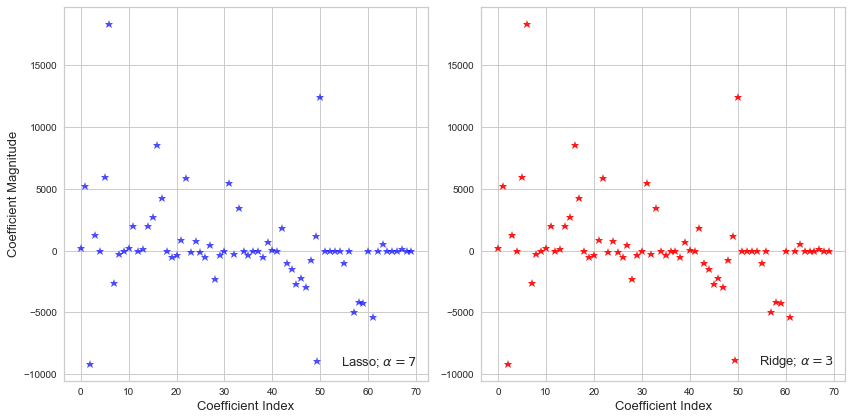

In [32]:
# plots coeficientes 
plt.figure(figsize=(12,6))

# Lasso
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,ls='none',marker='*' ,markersize=9,color='blue',label=r'Lasso; $\alpha = 7$',zorder=7)
plt.xlabel('Coefficient Index',fontsize=13)
plt.ylabel('Coefficient Magnitude',fontsize=13)
plt.legend(fontsize=13,loc=4)
plt.grid(True)


# Ridge 
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.9, ls='none', marker='*',markersize=9,color='red',label=r'Ridge; $\alpha = 3$',zorder=7)
plt.xlabel('Coefficient Index',fontsize=13)
plt.legend(fontsize=13,loc=4)

plt.grid(True)
plt.tight_layout()
plt.show()

Essa análise de magnitude mostra que no Lasso houve 18 features com coeficientes zerados, e no Ridge apenas 3 features tiveram seu coeficiente reduzido a zero,no ridge houve muitos coeficientes que chegaram muito perto de zero, mas não zeraram, a semelhança com o Lasso. 

<b> A diferença entre as duas regularizções é: Lasso reduz os coeficientes das features menos importantes para zero, removendo features do modelo, Ridge vai suavizar os coeficientes é Muito difícil ela zerar coeficientes, não é da natureza do Ridge, mas neste caso o modelo zerou 3 features.     
<br>
<hr>
<hr>
<br>

#### Penalização Ridge

Lambda do Ridge adiciona <b>magnitude ao quadrado dos coeficientes</b> como temor de penalização da função de custo. 

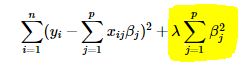

#### Penalização Lasso

Vemos a função lambda que adiciona o <b>valor absoluto da magnitude dos coeficientes</b> como termo de penalização da função de custo.

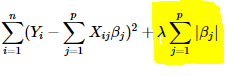

Se lambda é zero na função do Ridge, você pode imaginar que voltaremos ao OLS. No entanto, se o lambda for muito grande, ele adicionará muito peso e levará a um ajuste insuficiente. Dito isto, é importante como o lambda é escolhido. Essa técnica funciona muito bem para evitar problemas de ajuste excessivo, no model aplicado com Ridge obtivemos 3 Features "Retiradas" da construção do modelo, seus coeficientes zerados comprovam a regularização para Ridge.


No Lasso Novamente, se lambda for zero, retornaremos o OLS, enquanto um valor muito alto fará com que os coeficientes sejam zero e, portanto, ficará mal ajustado.
o diferença chaveentre essas técnicas está o Lasso que reduz o coeficiente do recurso menos importante para zero, removendo algum recurso. Então, isso funciona bem paraseleção de recursos caso tenhamos um grande número de recursos. Neste caso temos uma alta dimensionalide e utilizei um valor de alpha de 7.0 aplicado ao Lasso. 

<br>
<hr>
<br>

### Gráfico de Resíduos 
Os resíduos, no contexto dos modelos de regressão, são a diferença entre o valor observado da variável alvo (y) e o valor previsto (ŷ), ou seja, o erro da previsão. O gráfico de resíduos mostra a diferença entre os resíduos no eixo vertical e a variável dependente no eixo horizontal, permitindo detectar regiões no destino que podem ser suscetíveis a mais ou menos erros.

<br>

### Gráfico de erro de previsão 

Um gráfico de erro de previsão mostra os destinos reais do conjunto de dados em relação aos valores previstos gerados pelo nosso modelo. Isso nos permite ver quanta variação há no modelo. Os cientistas de dados podem diagnosticar modelos de regressão usando esse gráfico comparando com a linha de 45 graus, onde a previsão corresponde exatamente ao modelo.

Esse gráfico tem uma eficácia maior, pois ele identifica a Regressão da reta construída apartir do modelo, e estima qual seria a melhorar reta que representa os dados. 

<br>
<hr>

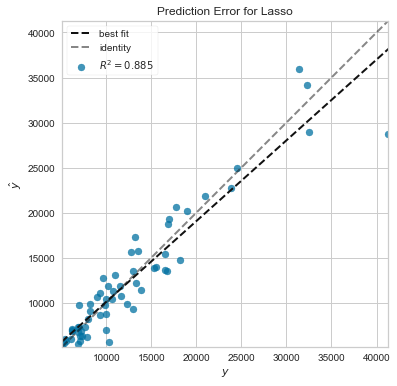

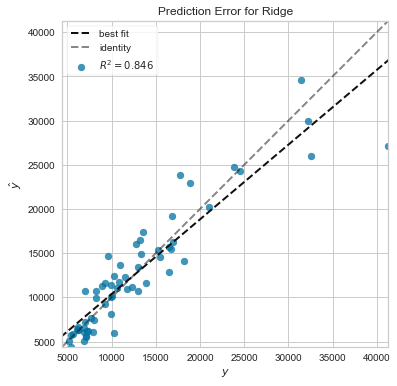

In [33]:
# Gráficos erro de predição

plt.figure(figsize=(10,6))
lasso = Lasso(alpha=5.0, random_state=12)
visualizer_01 = PredictionError(lasso)
visualizer_01.fit(X_train_lasso, y_train_lasso)  
visualizer_01.score(X_test_lasso, y_test_lasso)  
visualizer_01.show()

print('\n')


plt.figure(figsize=(10,6))
ridge = Ridge(alpha=3.0, random_state=12)
visualizer_02 = PredictionError(ridge)
visualizer_02.fit(X_train_ridge, y_train_ridge)  
visualizer_02.score(X_test_ridge, y_test_ridge)  
visualizer_02.show()

<br>
<hr>
<hr>
<br>

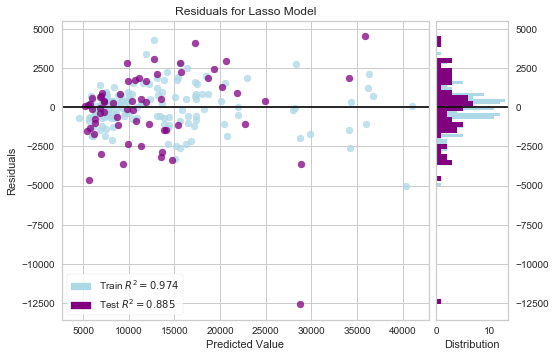

MAE: 1697.9550591004738




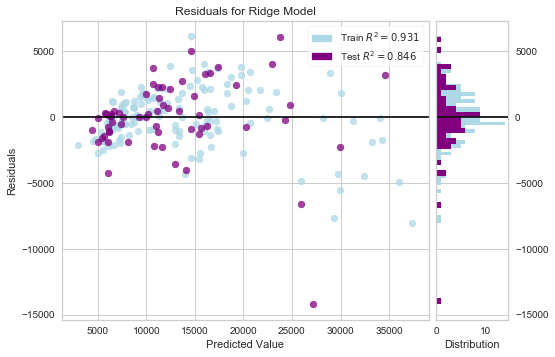

MAE: 1885.9278247533562




<Figure size 576x396 with 0 Axes>

In [34]:
#colors = ['orange' ---- 'purple']
# Resíduos Lasso
visualizer_lasso = ResidualsPlot(lasso, train_color='lightblue', test_color='purple')
visualizer_lasso.fit(X_train_lasso, y_train_lasso)  
visualizer_lasso.score(X_test_lasso, y_test_lasso) 
visualizer_lasso.show()
print('MAE: {}'.format(mean_absolute_error(y_test_lasso, y_pred_lasso)))

print('\n')


# Resíduos Ridge 
visualizer_ridge = ResidualsPlot(ridge, train_color='lightblue', test_color='purple') 
visualizer_ridge.fit(X_train_ridge, y_train_ridge)  
visualizer_ridge.score(X_test_ridge, y_test_ridge) 
visualizer_ridge.show()
print('MAE: {}'.format(mean_absolute_error(y_test_ridge, y_pred_ridge)))

print('\n')
plt.tight_layout()
plt.show()

<hr>
<br>
<hr>

In [35]:
# Resumo Baseline
print('----------- BASELINE -----------')
print('\n')
print('Número de Features: {}'.format(X_baseline.shape[1]))
print('MSE: {}%'.format(mean_squared_error(y_test_baseline, y_pred_baseline)))
print('MAE: {}%'.format(mean_absolute_error(y_test_baseline, y_pred_baseline)))
print('R2: {}%'.format(r2_score(y_test_baseline, y_pred_baseline).round(5)*100))
print('\n')
    
    
# Resumo Ridge 
print('-------------- RIDGE ---------------')
print('\n')
print('Número de Features Entrada: {}'.format(X_ridge.shape[1]))
print('MSE: {}%'.format(mean_squared_error(y_test_ridge, y_pred_ridge)))
print('MAE: {}%'.format(mean_absolute_error(y_test_ridge, y_pred_ridge)))
print('R2: {}%'.format(r2_score(y_test_ridge, y_pred_ridge).round(5)*100))
print('R2 ajustado: {}%'.format(adj_r2_ridge.round(5)*100))
print('\n')
    
    
    
# Resumo Lasso
print('-------------- LASSO ---------------')
print('\n')
print('Número de Features Entrada: {}'.format(X_lasso.shape[1]))
print('MSE: {}'.format(mean_squared_error(y_test_lasso, y_pred_lasso)))
print('MAE: {}'.format(mean_absolute_error(y_test_lasso, y_pred_lasso)))
print('R2: {}%'.format(r2_score(y_test_lasso, y_pred_lasso).round(5)*100))
print('R2 ajustado: {}%'.format(adj_r2_lasso.round(5)*100))
print('\n')

----------- BASELINE -----------


Número de Features: 70
MSE: 1.1335776139747581e+30%
MAE: 144121003083131.56%
R2: -2.0927278165729552e+24%


-------------- RIDGE ---------------


Número de Features Entrada: 70
MSE: 8347042.310651146%
MAE: 1885.9278247533562%
R2: 84.59%
R2 ajustado: 69.609%


-------------- LASSO ---------------


Número de Features Entrada: 70
MSE: 6247120.844975361
MAE: 1697.9550591004738
R2: 88.467%
R2 ajustado: 77.254%




<hr>
<br>
<hr>
<br>
<hr>

### Interpretando modelos 

Utilizando a biblioteca Shap que tem a finalidade de explicar as decisões do modelo de uma forma simples e objetiva. 

O objetivo do SHAP é explicar a previsão de uma instância x calculando a contribuição de cada recurso na previsão. O método de explicação SHAP calcula os valores de Shapley a partir da teoria dos jogos de coalizão.

Usar os dados de X_train para explicar o modelo, a lógica é interpretar as decisões contidads nos dados de treino do modelo,por terem sido os dados em que o modelo aprendeu e treinou.

In [36]:
import shap 
shap.initjs()

O KernelSHAP estima para uma instância x as contribuições de cada valor do recurso para a previsão

In [37]:
# Explainer armazena o modelo e as Features - LASSO 
explainer = shap.KernelExplainer(lasso.predict, X_train_lasso)
shap_values = explainer.shap_values(X_train_lasso)

Using 143 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<hr>

Vou utilizar apenas o Summary_plot para este caso de uso. O Summary plot vai examinar as features que mais impactam a decisão do modelo, é feito um cálculo interno que não vou abordar aqui neste projeto pois esse não é meu objetivo, com esse plot eu consigo análisar cada feature do modelo e o impacto na predição dos preços.

###### Como interpretar o plot gerado ? 
 Ele apresenta no Y as features com o melhor Ranking de impacto no modelo, no X os valores do Target do modelo que seriam a feature Price, como estamos usando para interpretar um problema de Regressão o formato muda um pouco comparado a interpretabilidade para modelos de classificação, e no eixo Y do lado direito do plot tem uma barra colorida que indica se o valor da feature é alto ou baixo e o quanto influência na decisão do Regressor

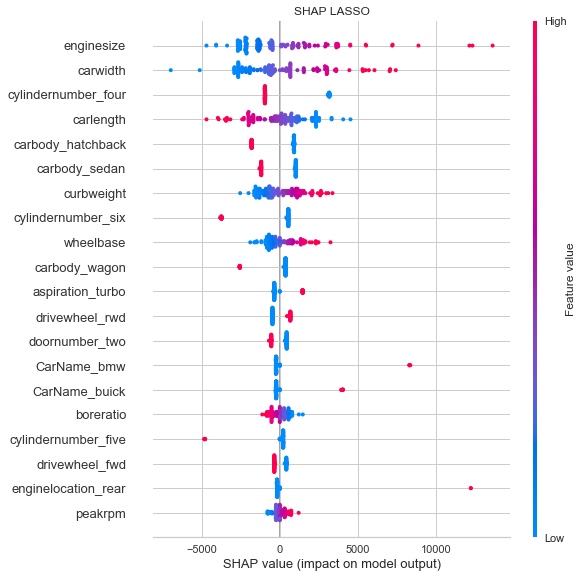

In [38]:
# Interpretando Lasso
plt.figure()
plt.title('SHAP LASSO')
shap.summary_plot(shap_values, X_train_lasso)

No modelo de Lasso ele considerou enginesize(Tamanho do carro) como a feature com maior importância no modelo, quanto maior o Tamanho do carro o modelo entende que maior será o valor do carro (entre uma faixa de 0  ultralpassando 10,000 mil dólares em alumas amostras) 

Logo abaixo, e a segunda mais importante Feature entendida pelo modelo Lasso, foi a carwidth (Largura do carro) quanto maiores, maior o impacto no Preço do automóvel.

<br>
<hr>
<hr>

In [39]:
# Interpretando Ridge 
explainer_ridge = shap.KernelExplainer(ridge.predict, X_train_ridge)
shap_values_ridge = explainer_ridge.shap_values(X_train_ridge)

Using 143 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


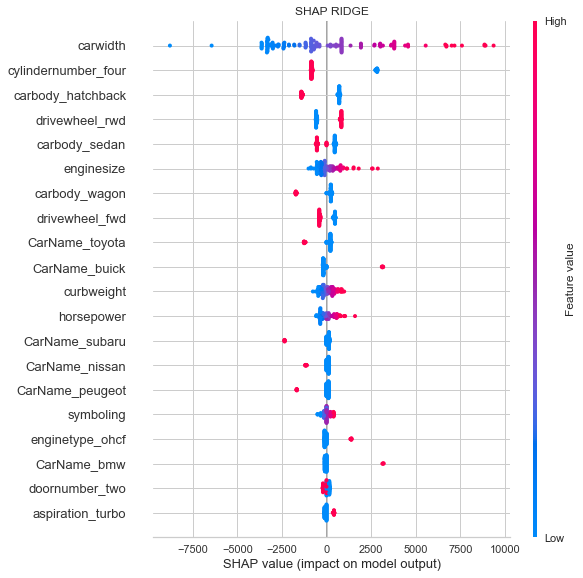

In [40]:
plt.figure()
plt.title('SHAP RIDGE')
shap.summary_plot(shap_values_ridge, X_train_ridge)

O modelo de Ridge tem uma penalização menor, e um peso diferente do termo de penalização inserido no Lasso, ele teve uma interpretação diferente do modelo do Lasso, interpreta que carwidth(Largura do carros) é a feature de maior impacto no modelo de Ridge, quanto maior a largura do carros maior o Preço. Em segundo ficou cylindernumber_four(cilíndro colocado no carros) mostra que quanto menor for o seu valor, maior será o Preço do carro.

Fica claro que os dois modelos obtiveram interpretações importância e impacto no modelo diferentes, o oque é normal, de fato o termo penalização do Lasso foi maior e tem por característica afetar Features que não tem um grau de significância no modelo, já Ridge tinha 67 Features no modelo. 

SHAP é uma ótima biblioteca para interpretar as decisões de um modelo, eu apliquei uma das inúmeras funcionalidades que tem nela, muito efetiva para abrir a BlackBox do Machine learning, vale a pena estudar essa biblioteca por inteiro ! 

<br>
<hr>

### Salvando modelos 

In [41]:
def save_models():
    '''
    Salvar os modelos de Lasso e Ridge 
    '''
    filename_lasso = 'Lasso_CarsPredictions.pkl'
    filename_ridge = 'Ridge_CarsPredictions.pkl'
    
    try:
        joblib.dump(lasso, filename_lasso)
        joblib.dump(ridge, filename_ridge)
    except TypeError as e:
        print('Erro: {}'.format(e))
    finally:
        print('Modelos Salvos')

In [42]:
save_models()

Modelos Salvos


<br>
<hr>
<hr>
<hr>
<br>

## Conclusão

O pipeline deste projeto foi desenvolvido para identificar, diferentes formas de resolução de problemas de Regressão fazendo uso de Lasso(L1) e Ridge(L2) que são dois modelos de Regressão linear que possuem um termo de penalinadade na função de custo, meu objetivo foi trabalhar com o foco em criar um comparativo entre os modelos, e a busca pela melhor solução dentre as possibilidades apresentadas, fiz uso de uma técnica de Baseline que consistia em definir um critério, de aceitação através de uma métrica, nesse caso eu estava de olho no <b> MAE </b> e <b> R2-Ajustado </b> como meu objetivo de otimização, a modelagem para aplicar os Regularizadores Lasso e Ridge na regressão foi bem simples, determinei que a própria natureza dos algoritmos bastasse, fiz um enfoque grande em explanar o funcionamento de ambos os regularizadores, o modelo de Baseline obteve um R2 negativo interpretando isso pode-se dizer que, um modelo se baseando pela média de preço acertaria mais que, o modelo da Baseline, já com o Lasso e o Ridge tivemos um modelo bom, pois as maiores fraquezas e contras desse Conjunto de dados é a quantidade pequena na amostra, com apenas 205 amostra o modelo obteve um Score bom e satisfatório, talvez com um número maior de amostras o modelo poderia ter tido um desempenho melhor. 

https://blog.minitab.com/pt/como-interpretar-os-resultados-da-analise-de-regressao-valores-p-e-coeficientes

https://github.com/slundberg/shap

<br>
<hr>
<hr>

In [49]:
from sklearn.model_selection import learning_curve 

In [52]:
X = cancer.data
y = cancer.target 

In [95]:

train_sizes, train_scores, test_scores = learning_curve(lasso, X_lasso, y_lasso, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.01, 1, 50), verbose=1)


[learning_curve] Training set sizes: [  1   4   8  11  14  18  21  24  28  31  34  38  41  44  48  51  54  57
  61  64  67  71  74  77  81  84  87  91  94  97 101 104 107 110 114 117
 120 124 127 130 134 137 140 144 147 150 154 157 160 164]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.6s finished


In [94]:
train_mean = np.mean(train_scores, axis=1)


In [90]:
train_std = np.std(train_scores, axis=1)


In [91]:
test_mean = np.mean(test_scores, axis=1)


In [92]:
test_std = np.std(test_scores, axis=1)


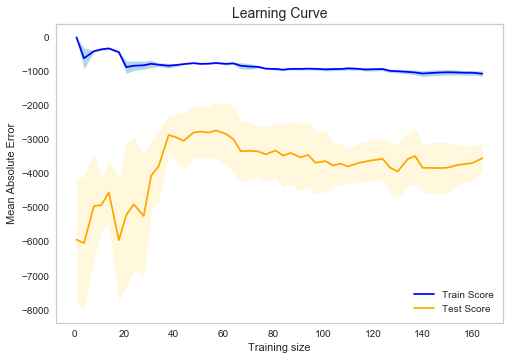

In [93]:

# Sobreamento 
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='lightblue')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#FFF8DC')


# Treino 
plt.plot(train_sizes, train_mean, color='blue', label='Train Score')

# Teste
plt.plot(train_sizes, test_mean, color='orange', label='Test Score')


plt.xlabel('Training size')
plt.ylabel('Mean Absolute Error')
plt.grid(False)
plt.title('Learning Curve', fontsize=14)
plt.legend(loc=4)
plt.show()